In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
from ast import literal_eval
import plotly.express as px

# Load the data
df = pd.read_csv("../data/processed/telegram_data_cleaned.csv")  # Replace with your actual filename
first_5_channels = df['Channel Username'].drop_duplicates().head(5)
df = df[df['Channel Username'].isin(first_5_channels)]
# Ensure tokens are parsed correctly from string to list
df['tokens'] = df['tokens'].apply(literal_eval)
df['Date'] = pd.to_datetime(df['Date'])

# Optional: Extract just the date
df['day'] = df['Date'].dt.date

C:\Users\hp\AppData\Local\Temp\ipykernel_37412\1885025111.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_37412\1885025111.py:10: UserWarning:

Glyph 4632 (\N{ETHIOPIC SYLLABLE MA}) missing from font(s) DejaVu Sans.

C:\Users\hp\AppData\Local\Temp\ipykernel_37412\1885025111.py:10: UserWarning:

Glyph 4752 (\N{ETHIOPIC SYLLABLE NA}) missing from font(s) DejaVu Sans.

C:\Users\hp\AppData\Local\Temp\ipykernel_37412\1885025111.py:10: UserWarning:

Glyph 4667 (\N{ETHIOPIC SYLLABLE SHAA}) missing from font(s) DejaVu Sans.

C:\Users\hp\AppData\Local\Temp\ipykernel_37412\1885025111.py:10: UserWarning:

Glyph 4844 (\N{ETHIOPIC SYLLABLE YEE}) missing from font(s) DejaVu Sans.

C:\Users\hp\AppData\Local\Temp\ipykernel_37412\1885025111.py:10: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.


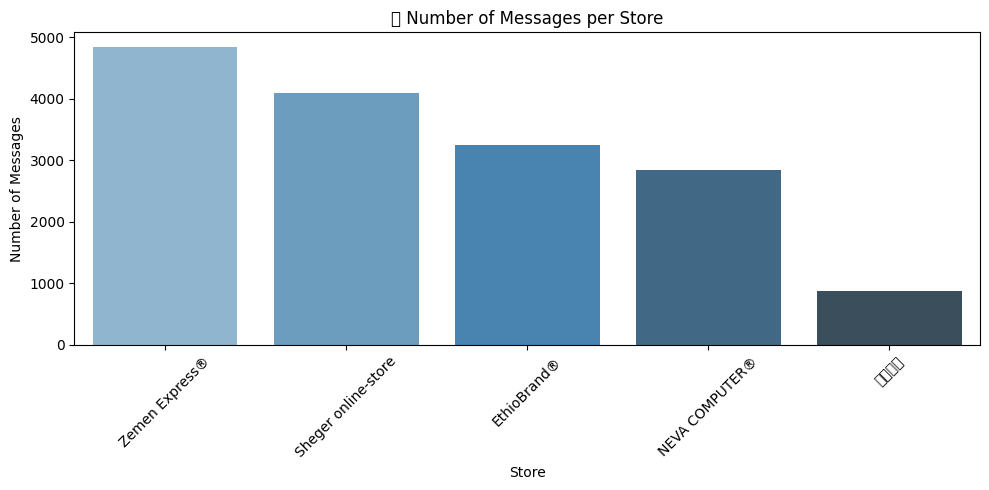

In [6]:
# Plot number of messages per store
msg_count = df['Channel Title'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=msg_count.index, y=msg_count.values, palette="Blues_d")
plt.title("📦 Number of Messages per Store")
plt.xlabel("Store")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
df_daily = df.groupby(['day', 'Channel Title']).size().reset_index(name='count')

fig = px.line(df_daily, x='day', y='count', color='Channel Title',
              title='📆 Daily Message Frequency by Store')
fig.show()

📨 Total number of messages: 15917
🏪 Total number of unique channels/stores: 5


C:\Users\hp\AppData\Local\Temp\ipykernel_37412\364097587.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_37412\364097587.py:20: UserWarning:

Glyph 4632 (\N{ETHIOPIC SYLLABLE MA}) missing from font(s) DejaVu Sans.

C:\Users\hp\AppData\Local\Temp\ipykernel_37412\364097587.py:20: UserWarning:

Glyph 4752 (\N{ETHIOPIC SYLLABLE NA}) missing from font(s) DejaVu Sans.

C:\Users\hp\AppData\Local\Temp\ipykernel_37412\364097587.py:20: UserWarning:

Glyph 4667 (\N{ETHIOPIC SYLLABLE SHAA}) missing from font(s) DejaVu Sans.

C:\Users\hp\AppData\Local\Temp\ipykernel_37412\364097587.py:20: UserWarning:

Glyph 4844 (\N{ETHIOPIC SYLLABLE YEE}) missing from font(s) DejaVu Sans.

C:\Users\hp\AppData\Local\Temp\ipykernel_37412\364097587.py:20: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

c:

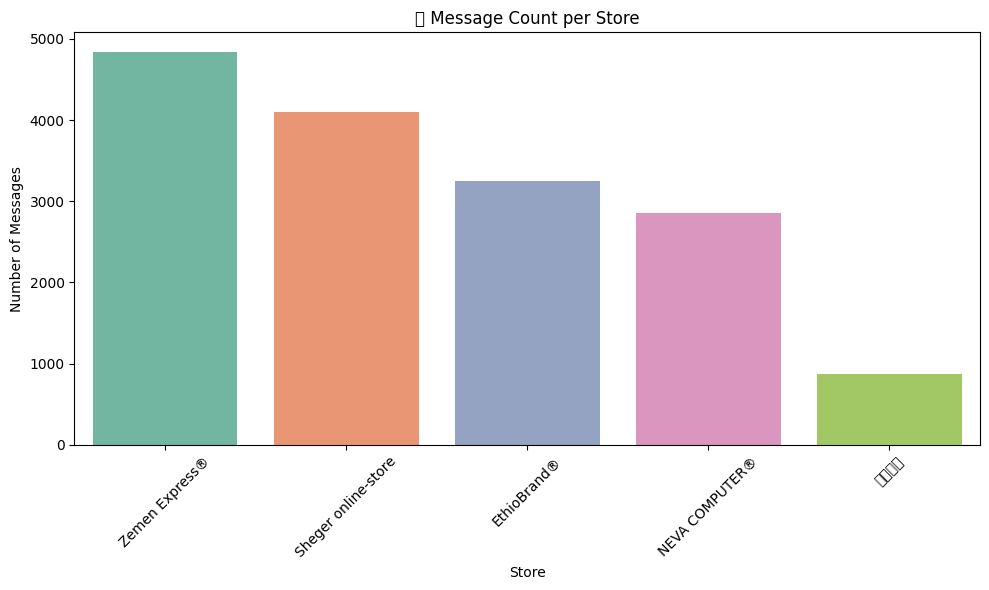

: 

In [ ]:

# Total number of messages
total_messages = len(df)
print("📨 Total number of messages:", total_messages)

# Total number of unique channels/stores
total_channels = df['Channel Title'].nunique()
print("🏪 Total number of unique channels/stores:", total_channels)

# Message count per store
message_counts = df['Channel Title'].value_counts().reset_index()
message_counts.columns = ['Store', 'Message Count']

# Bar chart comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=message_counts, x='Store', y='Message Count', palette="Set2")
plt.title("📊 Message Count per Store")
plt.xlabel("Store")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Avg Views/Post,Posts/Week,Avg Price (ETB),Lending Score
Vendor,,,,
@ethio_brand_collection,36957.83,7.89,2274.70,18482.86
@ZemenExpress,13114.31,23.34,1812.61,6568.82
@Shageronlinestore,13028.62,27.67,2102.99,6528.15
@nevacomputer,5359.62,7.49,34055.48,2683.56
@meneshayeofficial,2748.39,6.35,4813.64,1377.37


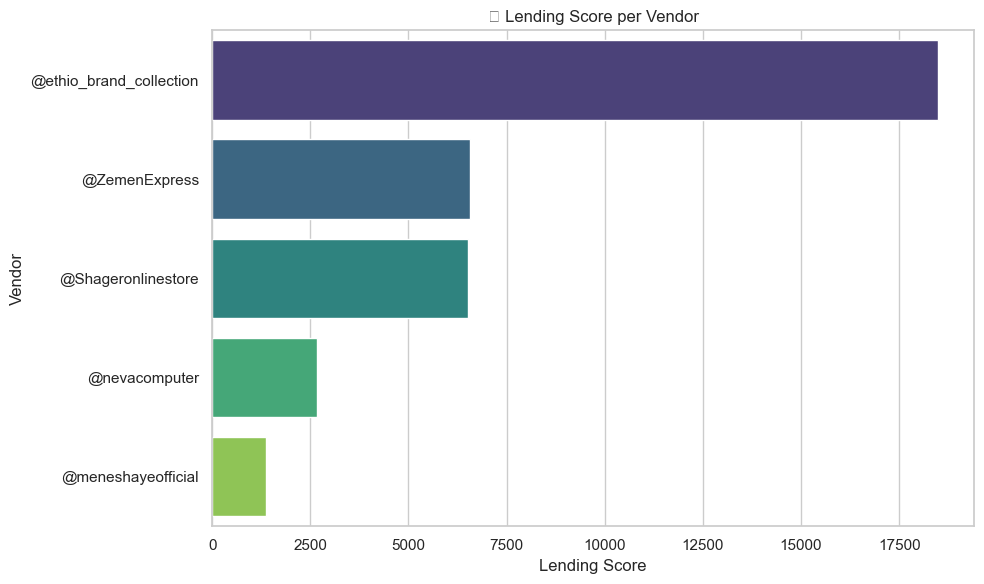

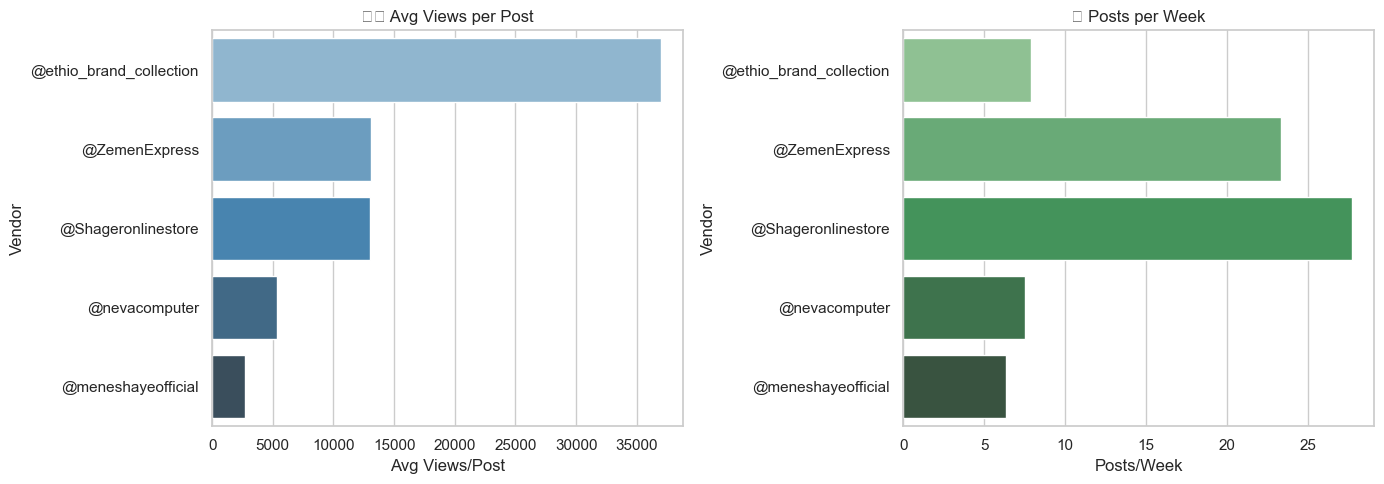

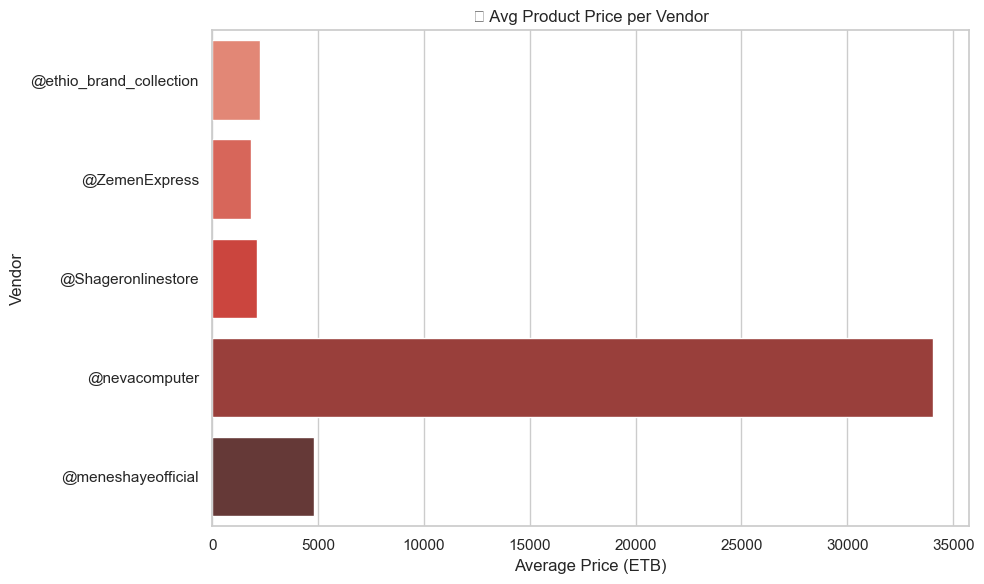

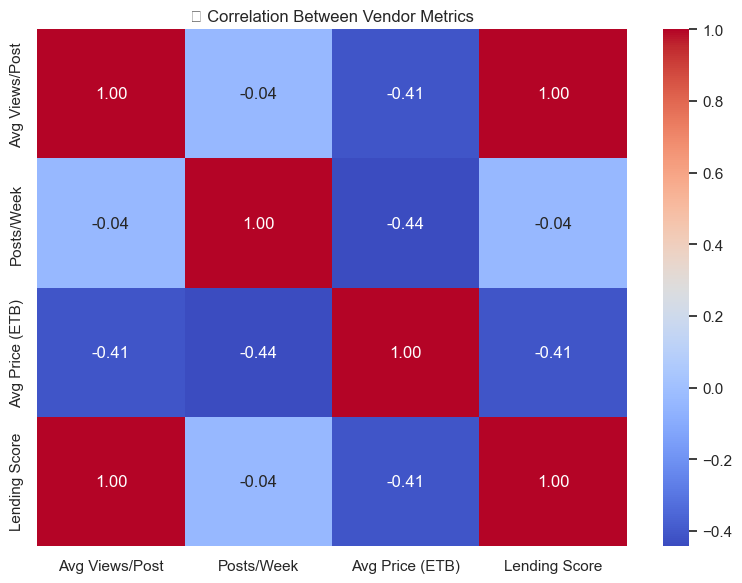

In [ ]:
#  Imports
import matplotlib.ticker as ticker
import numpy as np
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Load Vendor Scorecard Data
data = {
    "Vendor": ["@ethio_brand_collection", "@ZemenExpress", "@Shageronlinestore", "@nevacomputer", "@meneshayeofficial"],
    "Avg Views/Post": [36957.83, 13114.31, 13028.62, 5359.62, 2748.39],
    "Posts/Week": [7.89, 23.34, 27.67, 7.49, 6.35],
    "Avg Price (ETB)": [2274.70, 1812.61, 2102.99, 34055.48, 4813.64],
    "Lending Score": [18482.86, 6568.82, 6528.15, 2683.56, 1377.37],
}

scorecard_df = pd.DataFrame(data)
scorecard_df = scorecard_df.sort_values("Lending Score", ascending=False)

# Overview Table
display(scorecard_df.set_index("Vendor"))

# Lending Score Ranking
plt.figure(figsize=(10, 6))
sns.barplot(
    data=scorecard_df,
    x="Lending Score",
    y="Vendor",
    palette="viridis"
)
plt.title("📈 Lending Score per Vendor")
plt.xlabel("Lending Score")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

# Views and Posts Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(
    data=scorecard_df,
    x="Avg Views/Post",
    y="Vendor",
    palette="Blues_d",
    ax=axes[0]
)
axes[0].set_title("👁️ Avg Views per Post")

sns.barplot(
    data=scorecard_df,
    x="Posts/Week",
    y="Vendor",
    palette="Greens_d",
    ax=axes[1]
)
axes[1].set_title("📅 Posts per Week")

plt.tight_layout()
plt.show()

# Average Price Comparison
plt.figure(figsize=(10, 6))
sns.barplot(
    data=scorecard_df,
    x="Avg Price (ETB)",
    y="Vendor",
    palette="Reds_d"
)
plt.title("💰 Avg Product Price per Vendor")
plt.xlabel("Average Price (ETB)")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

# Correlation Analysis
corr = scorecard_df.drop(columns=["Vendor"]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📉 Correlation Between Vendor Metrics")
plt.tight_layout()
plt.show()